<h1><center>PART A</center></h1>

### 1) Import numpy, pandas, seaborn, matplotlib

In [1]:
# your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# leave this cell blank

### 2) Read the heart.csv file into a dataframe called df, and  view a 2% random sample of the data

In [3]:
# your code here
df=pd.read_csv("heart.csv")
df.sample(frac=0.02)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2,0
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2,0


In [4]:
# leave this cell blank

### 3) Split the data into Xtrain, Xtest, ytrain, ytest - with 30% in test, and random_state=1

In [5]:
# your code here
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(df.drop(['target'], axis=1), df['target'], random_state=1, test_size=0.3)

In [6]:
# leave this cell blank

### 4) Create two lists called numeric_features (with age, trestbps, chol, thalach, oldspeak), and categorical_features (with sex, cp, fbs, restecg, exang, slope, ca, thal)

In [7]:
# your code here
numeric_features=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [8]:
# leave this cell blank

### 5) Get basic stats on Xtrain (such as count, mean, std, etc)

In [9]:
# your code here
Xtrain.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,54.075472,0.712264,0.966981,130.849057,243.495283,0.146226,0.533019,150.146226,0.325472,1.012736,1.438679,0.702830,2.320755
std,9.204571,0.453779,1.022887,17.626882,46.609856,0.354169,0.518697,23.465258,0.469660,1.089449,0.608794,1.007739,0.600902
min,29.000000,0.000000,0.000000,94.000000,141.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.750000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,137.750000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,155.000000,0.000000,0.800000,1.500000,0.000000,2.000000
75%,60.000000,1.000000,2.000000,140.000000,271.500000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,192.000000,417.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000


In [10]:
# leave this cell blank

### 6) Check if there are any NaNs in any of the columns in Xtrain

In [11]:
# your code here
Xtrain.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [12]:
# leave this cell blank

### 7) Create an annotated heatmap of the correlation between the numeric features in Xtrain

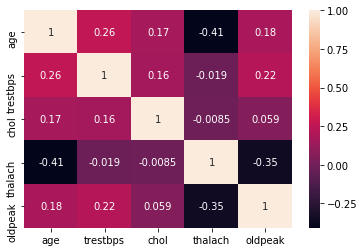

In [13]:
# your code here
sns.heatmap(Xtrain[numeric_features].corr(), annot=True)

In [14]:
# leave this cell blank

### 8) Standard Scale all of the numeric features in Xtrain, include transformed numeric features in Xtrain, and drop original numeric features in Xtrain

In [15]:
# your code here
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Xtrain_ss = pd.DataFrame(ss.fit_transform(Xtrain[numeric_features]), index=Xtrain.index, columns=['ss_'+col for col in numeric_features])
Xtrain = pd.concat([Xtrain, Xtrain_ss], axis=1)
Xtrain = Xtrain.drop(numeric_features, axis=1)

C:\Users\abhis\Anaconda3\envs\agupt215\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\abhis\Anaconda3\envs\agupt215\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
# leave this cell blank

### 9) OneHotEncode all of the categorical features in Xtrain, include transformed categorical features in Xtrain, and drop original categorical features in Xtrain

In [17]:
# your code here
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, dtype=int, handle_unknown='ignore')
Xcat = pd.DataFrame(ohe.fit_transform(Xtrain[categorical_features]), columns=ohe.get_feature_names(), index=Xtrain.index)
Xtrain = pd.concat([Xtrain, Xcat], axis=1)
Xtrain = Xtrain.drop(categorical_features, axis=1)

In [18]:
# leave this cell blank

### 10) Fit a Logistic Regression Model to training data with random_state=1

In [19]:
# your code here
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr.fit(Xtrain,ytrain)

C:\Users\abhis\Anaconda3\envs\agupt215\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
# leave this cell blank

### 11) Standard Scale all of the numeric features in Xtest, include transformed numeric features in Xtest, and drop original numeric features in Xtest

In [21]:
# your code here
Xtest_ss = pd.DataFrame(ss.transform(Xtest[numeric_features]), index=Xtest.index, columns=['ss_'+col for col in numeric_features])
Xtest = pd.concat([Xtest, Xtest_ss], axis=1)
Xtest = Xtest.drop(numeric_features, axis=1)

C:\Users\abhis\Anaconda3\envs\agupt215\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [22]:
# leave this cell blank

### 12) OneHotEncode all of the categorical features in Xtest, include transformed categorical features in Xtest, and drop original categorical features in Xtest

In [23]:
# your code here
XcatTest = pd.DataFrame(ohe.transform(Xtest[categorical_features]), columns=ohe.get_feature_names(), index=Xtest.index)
Xtest = pd.concat([Xtest, XcatTest], axis=1)
Xtest = Xtest.drop(categorical_features, axis=1)

In [24]:
# leave this cell blank

### 13) Predict and Evaluate Logisitic Regression Model on Xtest

In [25]:
# your code here
ypred = lr.predict(Xtest)
from sklearn import metrics
print (metrics.accuracy_score(ytest, ypred))
print (metrics.confusion_matrix(ytest, ypred))
print (metrics.classification_report(ytest, ypred))

0.8021978021978022
[[31 10]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        41
           1       0.81      0.84      0.82        50

   micro avg       0.80      0.80      0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [26]:
# leave this cell blank

<h1><center>Part B</center></h1>

### 14) (a) Read heart.csv file into a dataframe called df; (b) Split the data into Xtrain, Xtest, ytrain, ytest - with 30% in test, and random_state=1; (c) Create two lists called numeric_features (with age, trestbps, chol, thalach, oldspeak), and categorical_features (with sex, cp, fbs, restecg, exang, slope, ca, thal)

In [27]:
# your code here
import numpy as np
import pandas as pd
df=pd.read_csv("heart.csv")
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(df.drop(['target'], axis=1), df['target'], random_state=1, test_size=0.3)
numeric_features=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [28]:
# leave this cell blank

### 15) Create a pipeline called "numeric_transformer" with a StandardScaler step called "ss" (use the same parameters that you used in Part A above)

In [29]:
# your code here
from sklearn.pipeline import Pipeline
numeric_transformer = Pipeline(steps=[('ss', StandardScaler())])

In [30]:
# leave this cell blank

### 16) Create a pipeline called "categorical_transformer" with a OneHotEncoder step called "ohe" (use the same parameters that you used in Part A above)

In [31]:
# your code here
categorical_transformer = Pipeline(steps=[('ohe', OneHotEncoder(sparse=False, dtype=int, handle_unknown='ignore'))])

In [32]:
# leave this cell blank

### 17) Create a column transformer called "preprocessor" with two transformers: (a) the first transformer called "num" which uses the numeric_transformer (that you defined above) on the numeric_features; and (b) the second transformer called "cat" which uses the categorical_transformer (that you defined above) on the categorical_features

In [33]:
# your code here
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [34]:
# leave this cell blank

### 18) Create a pipeline called "clf" with two steps: (a) the first step called "pp" which invokes the preprocessor you defined above; and (b) the second step called "lr" which involkes a logisitc regression model  (use the same parameters that you used in Part A above)

In [35]:
# your code here
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
clf = Pipeline(steps=[('pp', preprocessor),
                      ('lr', LogisticRegression(random_state=1))])

In [36]:
# leave this cell blank

### 19) Fit the clf pipeline to the training data

In [37]:
# your code here
clf.fit(Xtrain,ytrain)

C:\Users\abhis\Anaconda3\envs\agupt215\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\abhis\Anaconda3\envs\agupt215\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\abhis\Anaconda3\envs\agupt215\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('pp', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True))]), ['age', 'trestbps', 'chol', 'thalach', 'oldpeak...e, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [38]:
# leave this cell blank

### 20) Predict and Evaluate clf pipeline on Xtest (you should end up with same results as in Part A above)

In [39]:
# your code here
ypred=clf.predict(Xtest)
from sklearn import metrics
print (metrics.accuracy_score(ytest, ypred))
print (metrics.confusion_matrix(ytest, ypred))
print (metrics.classification_report(ytest, ypred))

0.8021978021978022
[[31 10]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77        41
           1       0.81      0.84      0.82        50

   micro avg       0.80      0.80      0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



C:\Users\abhis\Anaconda3\envs\agupt215\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [40]:
# leave this cell blank